# Hyperparameter Tuning
1) It is technique that facilitates drawing the best estimators out of a combination of different estimators put together.<br>
2) It is used to tune model parameters to get better results(better accuracy, better R2Score) from the model.<br>
3) It can be implemented using the following two methods:

## 1) GridSearchCV
1) It takes into account all the permutations and combinations of the parameters and then returns the set of parameters that best optimizes the result.<br>
2) It takes a lot of time

## 2) RandomizedSearchCV
1) It takes into consideration few randomly selected combinations of parameters and then returns the set of parameters that best optimizes the result.<br>
2) It is comparitively faster than GridSearchCV

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
lbc = load_breast_cancer()
x = lbc.data
y = lbc.target
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(569, 30)
(569,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
features = lbc.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
print(x[:4])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [13]:
df = pd.DataFrame(x,columns=features)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape)                                                       
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [16]:
def gen_metrics(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix = \n',cm)
    print('Classification Report = \n',classification_report(ytest,ypred))
    print('Acc Score = ',accuracy_score(ytest,ypred))
    
def tt_score(model):
    print('Training Score = ', model.score(x_train,y_train))
    print('Testing Score = ', model.score(x_test,y_test))

### Random Forest with Hyperparameter Tuning

In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
hparams_rf = {'n_estimators':[50,70,90,100,120],
             'criterion':['gini','entropy'],
             'max_depth':[8,10,12,14],
             'min_samples_split':[15,20,25]}

print(hparams_rf)

{'n_estimators': [50, 70, 90, 100, 120], 'criterion': ['gini', 'entropy'], 'max_depth': [8, 10, 12, 14], 'min_samples_split': [15, 20, 25]}


### Using GridSearchCV Method:

In [17]:
rf = RandomForestClassifier()
gs1 = GridSearchCV(rf,param_grid=hparams_rf,scoring='accuracy')
gs1.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 14],
                         'min_samples_split': [15, 20, 25],
                         'n_estimators': [50, 70, 90, 100, 120]},
             scoring='accuracy')

In [18]:
print(gs1.best_params_)
print(gs1.best_estimator_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 15, 'n_estimators': 90}
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=15,
                       n_estimators=90)


In [19]:
tt_score(gs1)

Training Score =  0.9899497487437185
Testing Score =  0.9532163742690059


In [20]:
ypred_gs1 = gs1.predict(x_test)
print(ypred_gs1)

[1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1]


In [21]:
from collections import Counter

In [23]:
c1 = Counter(ypred_gs1)
print(c1)
print(c1.values())

Counter({1: 107, 0: 64})
dict_values([107, 64])


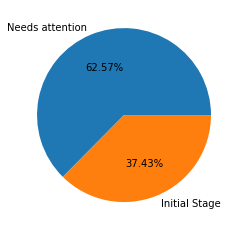

In [24]:
plt.pie(x=c1.values(),labels=['Needs attention','Initial Stage'],autopct='%.2f%%')
plt.show()

In [31]:
gen_metrics(y_test,ypred_gs1)
# Just/Only 8 misclassifications 
# [TP=62 , FN=6 ]
# [FP=2 , TN=101 ]

Confusion Matrix = 
 [[ 62   6]
 [  2 101]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        68
           1       0.94      0.98      0.96       103

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Acc Score =  0.9532163742690059


### DecisionTreeClassifier with RandomizedSearchCV

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':list(range(8,17)),
             'min_samples_split':list(range(10,30))}

print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16], 'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


In [27]:
dt1 = DecisionTreeClassifier()
rs1 = RandomizedSearchCV(dt1,param_distributions=hparams_dt,scoring='accuracy')
rs1.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 9, 10, 11, 12, 13, 14,
                                                      15, 16],
                                        'min_samples_split': [10, 11, 12, 13,
                                                              14, 15, 16, 17,
                                                              18, 19, 20, 21,
                                                              22, 23, 24, 25,
                                                              26, 27, 28, 29]},
                   scoring='accuracy')

In [34]:
tt_score(rs1)

Training Score =  0.9849246231155779
Testing Score =  0.9064327485380117


In [28]:
print('Best_Params ',rs1.best_params_)
print('Best_Estimator ',rs1.best_estimator_)

Best_Params  {'min_samples_split': 10, 'max_depth': 11, 'criterion': 'entropy'}
Best_Estimator  DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=10)


In [32]:
ypred_dt1 = rs1.predict(x_test)
print(ypred_dt1)

[1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1]


In [33]:
gen_metrics(y_test,ypred_dt1)

Confusion Matrix = 
 [[63  5]
 [11 92]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        68
           1       0.95      0.89      0.92       103

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171

Acc Score =  0.9064327485380117


### SVM with GridSearchCV

In [35]:
from sklearn.svm import SVC

In [36]:
hparams_svc = {'kernel':['linear','poly','rbf'],
              'C':[0.0001,0.001,0.01,0.1,1,10],
              'gamma':[0.001,0.01,0.1,1,10],
              'degree':[2,3,4,5]}

hparams_svc

{'kernel': ['linear', 'poly', 'rbf'],
 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1, 10],
 'degree': [2, 3, 4, 5]}

In [ ]:
svc1 = SVC()
gs2 = GridSearchCV(svc1,param_grid=hparams_svc,scoring='accuracy')
gs2.fit(x_train,y_train)
# Takes too much time

In [ ]:
tt_score(gs2)

In [ ]:
print('Best_Params ',gs2.best_params_)
print('Best_Estimator ',gs2.best_estimator_)

In [ ]:
ypred_svc1 = gs2.predict(x_test)
print(ypred_svc1)

In [ ]:
gen_metrics(y_test,ypred_svc1)